In [295]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [296]:
read_train_data=pd.read_csv("E:\\python\\housing\\train.csv")

In [297]:
read_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [298]:
read_train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [299]:
null_columns=read_train_data.columns[read_train_data.isnull().any()]
read_train_data[null_columns].isnull().sum()

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [300]:
read_train_data[null_columns].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [301]:
#Here we see which all columns have null values along with their count. This will be very helpful for selecting columns which
#should be dropped and columns in which null value replace treatment should be done.

#In column Alley, out of 1460 total rows, 1091 rows has null values, which is about 74.72% of data and hence we are going to 
#drop this column. 

#In column PoolQC, out of 1460 total rows, 1161 rows has null values, which is about 79.52% of data and hence we are going to 
#drop this column. 

#In column Fence, out of 1460 total rows, 931 rows has null values, which is about 63.76% of data and hence we are going to 
#drop this column. 

#In column MiscFeature, out of 1460 total rows, 1124 rows has null values, which is about 76.98% of data and hence we are going to 
#drop this column. 

# We can see these 4 columns have more than 60% data as null and hence we will drop these columns.


In [302]:
drop_fields = ['Id','Alley','PoolQC','Fence','MiscFeature']

for i in drop_fields:
    read_train_data.drop(i,axis=1,inplace=True)

In [303]:
# We are dropping Id column also as this column does not provide any useful information which can be used for model building
# process.

In [304]:
#Column LotFrontage has 214 null values in it which is about 14.65% of data. We will replace null value appropriately in this.

#Column FireplaceQu has 551 null values in it which is about 37.73% of data. We will replace null value appropriately in this.

#Now will work upon replacing the null values with proper values.

In [305]:
#Columns LotFrontage, MasVnrArea and GarageYrBlt are of float data type and hence we will replace null values in these
#columns with mean value.

In [306]:
numeric_fields = ['LotFrontage','MasVnrArea','GarageYrBlt']

for i in numeric_fields:
    read_train_data[i] = read_train_data[i].replace(' ',np.nan,regex=True)
    read_train_data[i]  = read_train_data[i] .fillna(read_train_data[i].mean())

In [307]:
read_train_data[numeric_fields].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [308]:
read_train_data[numeric_fields].dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [309]:
cat_fields = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
              'GarageFinish','GarageQual','GarageCond']

In [310]:
for i in cat_fields:
    read_train_data[i]=read_train_data[i].fillna(read_train_data[i].value_counts().index[0])

In [311]:
read_train_data[cat_fields].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [312]:
read_train_data['BsmtQual'][35]

'TA'

In [313]:
# Now we have replaced null values from object type columns with mode value. 

<AxesSubplot:>

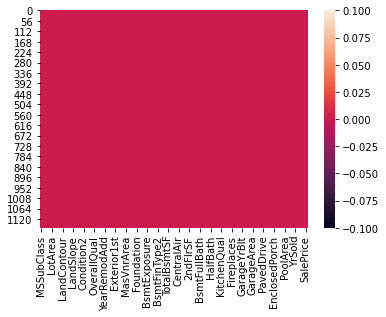

In [314]:
sns.heatmap(read_train_data.isnull())

In [315]:
read_train_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [316]:
#From above heat map we can see that now there are no null/ missing values in our dataset.

MSSubClass          AxesSubplot(0.125,0.799681;0.133621x0.0803191)
LotFrontage      AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
LotArea           AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
OverallQual      AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
OverallCond      AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
YearBuilt           AxesSubplot(0.125,0.703298;0.133621x0.0803191)
YearRemodAdd     AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
MasVnrArea        AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
BsmtFinSF1       AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
BsmtFinSF2       AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
BsmtUnfSF           AxesSubplot(0.125,0.606915;0.133621x0.0803191)
TotalBsmtSF      AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
1stFlrSF          AxesSubplot(0.44569,0.606915;0.133621x0.0803191)
2ndFlrSF         AxesSubplot(0.606034,0.606915;0.133621x0.0803191)
LowQualFinSF     AxesSubplot(0.766379,0.606915;0.133621x0.0803

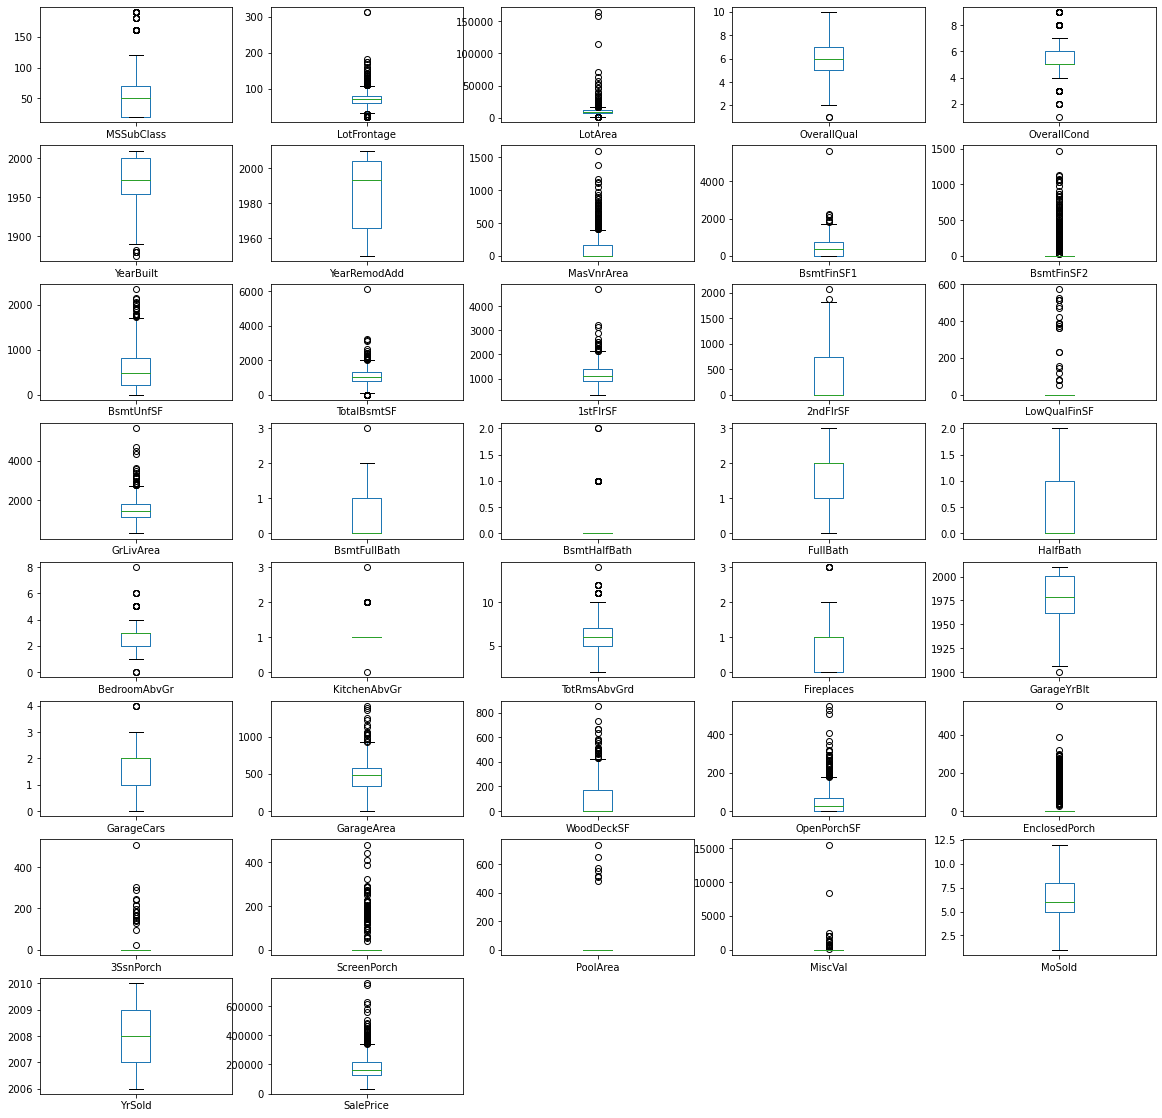

In [317]:
read_train_data.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,20))

In [318]:
read_train_data['LotArea'].mean(),read_train_data['LotArea'].min(), read_train_data['LotArea'].max()

(10484.749143835616, 1300, 164660)

In [319]:
read_train_data['MasVnrArea'].mean(),read_train_data['MasVnrArea'].min(), read_train_data['MasVnrArea'].max()

(102.31007751937983, 0.0, 1600.0)

In [320]:
read_train_data['BsmtFinSF2'].mean(),read_train_data['BsmtFinSF2'].min(), read_train_data['BsmtFinSF2'].max()

(46.647260273972606, 0, 1474)

In [321]:
read_train_data['BsmtUnfSF'].mean(),read_train_data['BsmtUnfSF'].min(), read_train_data['BsmtUnfSF'].max()

(569.7217465753424, 0, 2336)

In [322]:
read_train_data['1stFlrSF'].mean(),read_train_data['1stFlrSF'].min(), read_train_data['1stFlrSF'].max()

(1169.8604452054794, 334, 4692)

In [323]:
read_train_data['LowQualFinSF'].mean(),read_train_data['LowQualFinSF'].min(), read_train_data['LowQualFinSF'].max()

(6.38013698630137, 0, 572)

In [324]:
read_train_data['GrLivArea'].mean(),read_train_data['GrLivArea'].min(), read_train_data['GrLivArea'].max()

(1525.0667808219177, 334, 5642)

In [325]:
read_train_data['GarageArea'].mean(),read_train_data['GarageArea'].min(), read_train_data['GarageArea'].max()

(476.86044520547944, 0, 1418)

In [326]:
read_train_data['EnclosedPorch'].mean(),read_train_data['EnclosedPorch'].min(), read_train_data['EnclosedPorch'].max()

(23.01541095890411, 0, 552)

In [327]:
read_train_data['ScreenPorch'].mean(),read_train_data['ScreenPorch'].min(), read_train_data['ScreenPorch'].max()

(15.051369863013699, 0, 480)

In [328]:
read_train_data['MiscVal'].mean(),read_train_data['MiscVal'].min(), read_train_data['MiscVal'].max()

(47.31506849315068, 0, 15500)

In [329]:
#MSSubClass does not have any outlier, values of 160,180 and 190 are considered as outliers as per above box plot.

#LotFrontage column has 2 entries of 313 value which looks as outliers from rest of values in this field. we will go ahead with 
#this value.

#LotArea column has many entries which are greater than mean value of this column and since there is good possibility of few 
# plots can be very big plots and hence we are not going to do any treatment for outliers for this column.  

# MasVnrArea column has minimum value of 0.0 whereas max value of 1600 and hence some of data entries which are close to max
# value are being considered as outliers. We will not do any outlier treatment on this column.

# BsmtFinSF2 column has minimum value of 0.0 whereas max value of 1474 and hence some of data entries which are close to max
# value are being considered as outliers. We will not do any outlier treatment on this column.

# BsmtUnfSF column has minimum value of 0.0 whereas max value of 2336 and hence some of data entries which are close to max
# value are being considered as outliers. We will not do any outlier treatment on this column.

#In column LowQualFinSF since difference between mean value and max value is quite big, entries which are closwe to max value
# are being considered as outliers. We will not do any outlier treatment on this column.

#In column GarageArea since few entries/ plots dont have garage area, their entry value is 0 while some big plots have big 
#garage area which is very much likely. We will not do any outlier treatment on this column.

# In columns WoodDeckSF and OpenPorchSF, we dont see any significant outlier values in them. Since few plots are small and dont
# have these facilities, plots which are big and have big space for these facilities are being considered as outliers.

#In columns EnclosedPorch, ScreenPorch, MiscVal since difference between mean value and max value is quite big, entries which are closwe to max value
# are being considered as outliers. We will not do any outlier treatment on this column.

In [330]:
read_train_data.skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [331]:
#From above outliers description and skewness value we can see that for few columns skewness is quite big which
#indicates that data in these columns is highily dispersed, but since difference between minimum value and maximum value in these
#columns is quite big, data looks like highly dispersed.

In [332]:
read_train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,163.520016,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


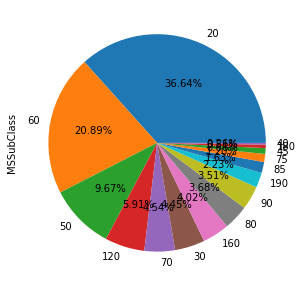

In [333]:
MSSubClass = read_train_data['MSSubClass'].value_counts()
MSSubClass.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [334]:
# MSSubClass of type 20: 1-STORY 1946 & NEWER ALL STYLES, forms the majority of plots in given data set.

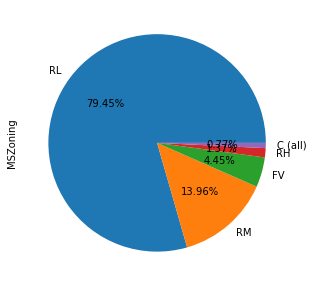

In [335]:
MSZoning = read_train_data['MSZoning'].value_counts()
MSZoning.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [336]:
# RL: Residential Low Density category forms the majority of plots.

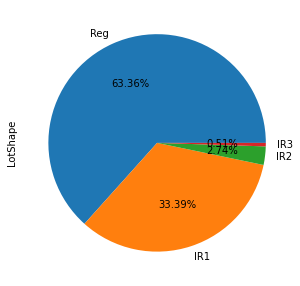

In [337]:
LotShape = read_train_data['LotShape'].value_counts()
LotShape.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [338]:
# Regular shape of property forms the majority of plots.

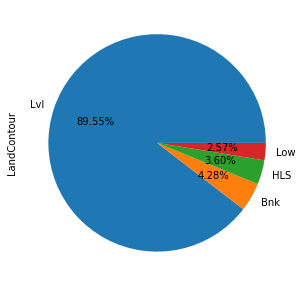

In [339]:
LandContour = read_train_data['LandContour'].value_counts()
LandContour.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

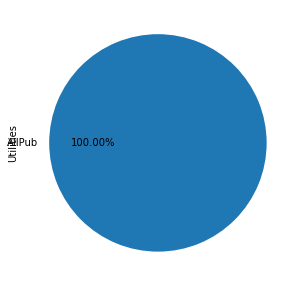

In [340]:
Utilities = read_train_data['Utilities'].value_counts()
Utilities.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [341]:
#Here we can see all the plots have All public Utilities (E,G,W,& S) which are very important while buying any house.

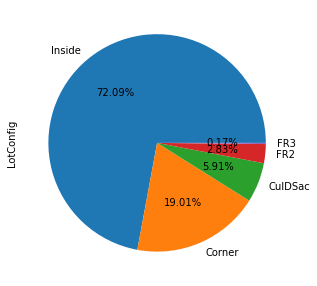

In [342]:
LotConfig = read_train_data['LotConfig'].value_counts()
LotConfig.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

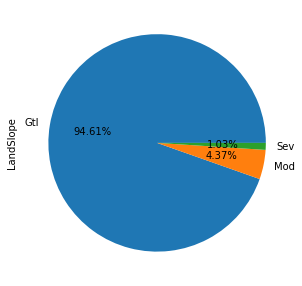

In [343]:
LandSlope = read_train_data['LandSlope'].value_counts()
LandSlope.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [344]:
# Majority of plots haave gentle slope.

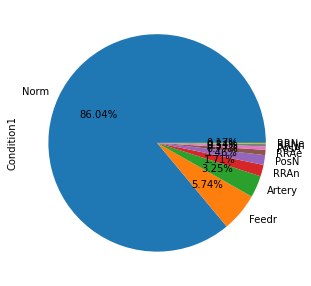

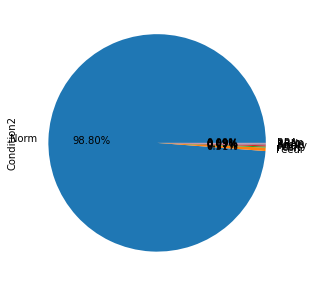

In [345]:
Condition1 = read_train_data['Condition1'].value_counts()
Condition1.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

Condition2 = read_train_data['Condition2'].value_counts()
Condition2.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()


In [346]:
#From above 2 pie charts we can see normal conditions forms majority of plots. These criteria forms an important aspect while 
#selecting any house as neighbourhood and nearest proximity places are very important

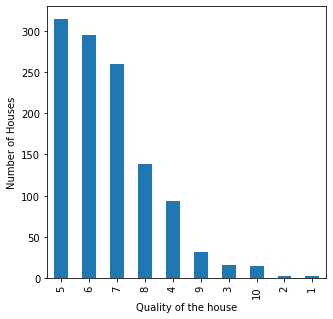

In [347]:
OverallQual = read_train_data['OverallQual'].value_counts()
OverallQual.plot(kind = 'bar',figsize=(5,5))
plt.xlabel("Quality of the house")
plt.ylabel("Number of Houses")
plt.show()

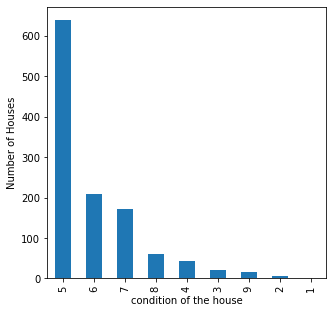

In [348]:
OverallCond = read_train_data['OverallCond'].value_counts()
OverallCond.plot(kind = 'bar',figsize=(5,5))
#plt.title("Rates the overall condition of the house")
plt.xlabel("condition of the house")
plt.ylabel("Number of Houses")
plt.show()

In [349]:
# From above two bar plots we can see that majority of houses in the dataset have average condition of the house and the
# material used is also of average quality.

<AxesSubplot:ylabel='Frequency'>

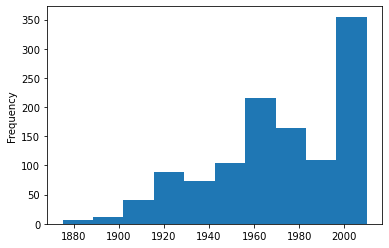

In [350]:
read_train_data['YearBuilt'].plot.hist()

In [351]:
#sns.pairplot(read_train_data)

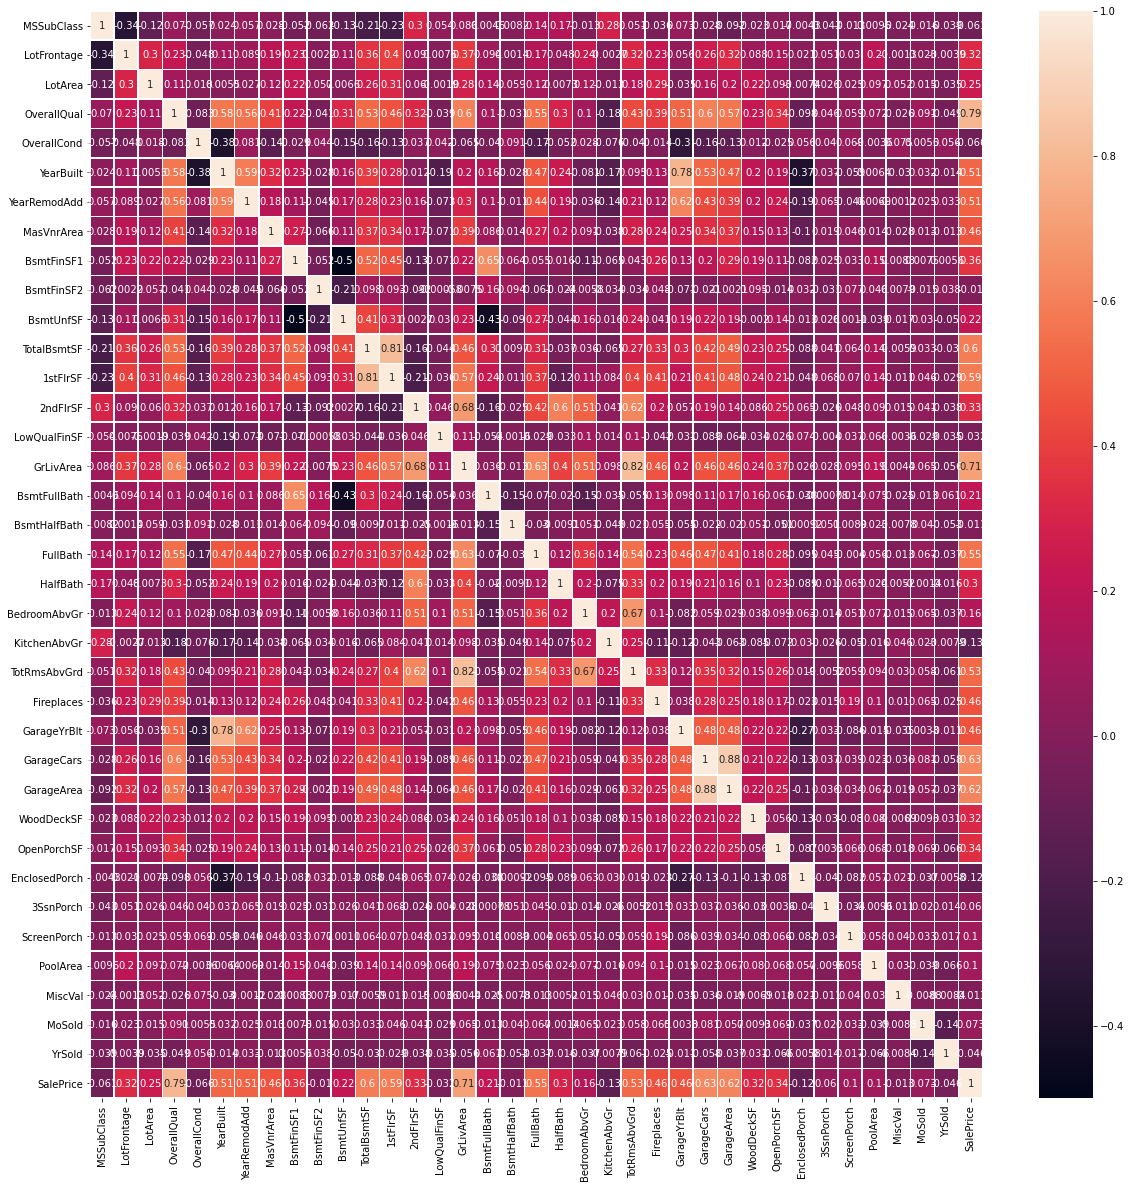

In [352]:
corr= read_train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=.5)
plt.show()

In [353]:
#We can see that columns 'Overall condition' and 'Year of Built' are very highly correlated to each other.
#Similarly columns 'MSSubclass' and 'LotFrontage' are very highly correlated to each other.

In [354]:
x = read_train_data.iloc[:,0:-1]

In [355]:
y = read_train_data.iloc[:,-1]

In [356]:
x.shape

(1168, 75)

In [357]:
y.shape

(1168,)

In [358]:
y.head(5)

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

In [359]:
x.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,0,2,2007,WD,Normal
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,207,0,0,224,0,0,10,2007,WD,Normal
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,130,0,0,0,0,0,6,2007,WD,Normal
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,122,0,0,0,0,0,1,2010,COD,Normal
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,6,2009,WD,Normal


In [360]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

x_labels = ['MSZoning','Street','LotShape','LandContour','Utilities',
'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
'HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
'PavedDrive','SaleType','SaleCondition']

for i in x_labels:
    x[i]=le.fit_transform(x[i])
    

In [361]:
x['BsmtFinType2']

0       5
1       4
2       5
3       5
4       5
       ..
1163    5
1164    5
1165    5
1166    5
1167    5
Name: BsmtFinType2, Length: 1168, dtype: int32

In [362]:
models = [KNeighborsRegressor(),LinearRegression(),RandomForestRegressor(),Lasso(),Ridge()]
#models = [LinearRegression()]
max_score = 0
for i in range(1,10):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    print("for round:", i)
    for j in models:
        print("Entered for:", j)
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=abs(r2_score(pred,test_y))
        print("for model:", j, "score is:",temp_score )
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

for round: 1
Entered for: KNeighborsRegressor()
for model: KNeighborsRegressor() score is: 0.1040314516918418
Entered for: LinearRegression()
for model: LinearRegression() score is: 0.7861206949437051
Entered for: RandomForestRegressor()
for model: RandomForestRegressor() score is: 0.8557579703849804
Entered for: Lasso()
for model: Lasso() score is: 0.7863208655313794
Entered for: Ridge()
for model: Ridge() score is: 0.7879537090156945
for round: 2
Entered for: KNeighborsRegressor()
for model: KNeighborsRegressor() score is: 0.22992161530443977
Entered for: LinearRegression()
for model: LinearRegression() score is: 0.6517823029570411
Entered for: RandomForestRegressor()
for model: RandomForestRegressor() score is: 0.8372339395368259
Entered for: Lasso()
for model: Lasso() score is: 0.6518323361222822
Entered for: Ridge()
for model: Ridge() score is: 0.6528265523274033
for round: 3
Entered for: KNeighborsRegressor()
for model: KNeighborsRegressor() score is: 0.4390947705270365
Entered f

In [363]:
rfg=RandomForestRegressor()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
rfg.fit(train_x,train_y)
predrfg = rfg.predict(test_x)
print("Random state used is:",final_temp_state)
print("R2 score:",abs(r2_score(predrfg,test_y)))
#print("Absolute squarred error:", mean_absolute_error(test_y,predrfg))
#print("Mean squarred error:", mean_squared_error(test_y,predrfg))

Random state used is: 8
R2 score: 0.8683612452146141


Text(0, 0.5, 'Predicted values')

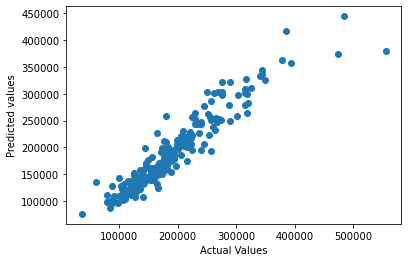

In [364]:
plt.scatter(x=test_y,y=predrfg)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [365]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [366]:
abc = AdaBoostRegressor(n_estimators=50,base_estimator=rfg,learning_rate=1)
#dtc=DecisionTreeClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
abc.fit(train_x,train_y)
predabc = abc.predict(test_x)
print("Accuracy score:",abs(r2_score(predabc,test_y)))

Accuracy score: 0.8981513346494514


Text(0, 0.5, 'Predicted values')

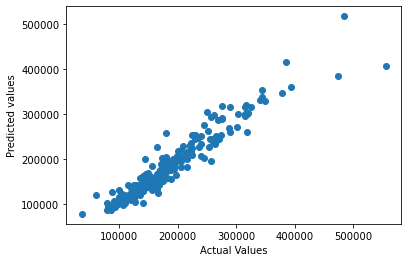

In [367]:
plt.scatter(x=test_y,y=predabc)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [368]:
#gbr = GradientBoostingRegressor(n_estimators=50,base_estimator=rfg,learning_rate=1)
gb_clf = GradientBoostingRegressor(n_estimators=50, learning_rate=1, max_features=2, max_depth=2, random_state=final_temp_state)
#dtc=DecisionTreeClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
gb_clf.fit(train_x,train_y)
predgb_clf = gb_clf.predict(test_x)
print("Accuracy score:",abs(r2_score(predgb_clf,test_y)))

Accuracy score: 0.646173145130655


Text(0, 0.5, 'Predicted values')

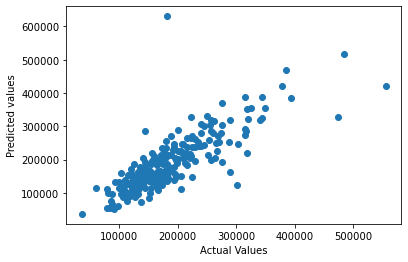

In [369]:
plt.scatter(x=test_y,y=predgb_clf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [370]:
import pickle
filename = 'E:\\python\\house_price_prediction.pkl'
pickle.dump(abc,open(filename,'wb'))

# Test data logic starts here

In [371]:
read_test_file = pd.read_csv('E:\\python\\housing\\test.csv')

In [372]:
read_test_file.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [373]:
read_test_file.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [374]:
read_test_file.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [375]:
null_columns=read_test_file.columns[read_test_file.isnull().any()]
read_test_file[null_columns].isnull().sum()

LotFrontage      45
Alley           278
MasVnrType        1
MasVnrArea        1
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinType2      7
Electrical        1
FireplaceQu     139
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
GarageCond       17
PoolQC          292
Fence           248
MiscFeature     282
dtype: int64

In [376]:
drop_fields = ['Id','Alley','PoolQC','Fence','MiscFeature']

for i in drop_fields:
    read_test_file.drop(i,axis=1,inplace=True)

In [377]:
numeric_fields = ['LotFrontage','MasVnrArea','GarageYrBlt']

for i in numeric_fields:
    read_test_file[i] = read_test_file[i].replace(' ',np.nan,regex=True)
    read_test_file[i] = read_test_file[i] .fillna(read_test_file[i].mean())

In [378]:
read_test_file[numeric_fields].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [379]:
cat_fields = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
              'GarageFinish','GarageQual','GarageCond','Electrical']

In [380]:
for i in cat_fields:
    read_test_file[i]=read_test_file[i].fillna(read_test_file[i].value_counts().index[0])

In [381]:
read_test_file[cat_fields].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Electrical      0
dtype: int64

In [382]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

x_labels = ['MSZoning','Street','LotShape','LandContour','Utilities',
'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
'HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
'PavedDrive','SaleType','SaleCondition']

for i in x_labels:
    read_test_file[i]=le.fit_transform(read_test_file[i])

In [383]:
for i in x_labels:
    print(x[i].dtype)

int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32


In [384]:
read_test_file[x_labels].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [385]:
read_test_file['MSZoning']

0      2
1      2
2      2
3      2
4      2
      ..
287    2
288    2
289    2
290    3
291    3
Name: MSZoning, Length: 292, dtype: int32

In [386]:
read_test_file

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.000000,14157,1,0,1,0,0,0,...,51,0,0,0,0,0,7,2007,5,2
1,120,2,66.425101,5814,1,0,3,0,1,0,...,0,0,0,0,0,0,8,2009,0,0
2,20,2,66.425101,11838,1,3,3,0,4,0,...,151,0,0,0,0,0,6,2009,5,2
3,70,2,75.000000,12000,1,3,0,0,4,0,...,0,0,0,0,0,0,7,2009,5,2
4,60,2,86.000000,14598,1,0,3,0,1,0,...,18,0,0,0,0,0,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,2,78.000000,10206,1,3,3,0,4,0,...,99,0,0,0,0,0,10,2008,5,2
288,20,2,57.000000,9245,1,1,3,0,4,0,...,0,0,0,0,0,0,2,2008,5,2
289,20,2,66.425101,11241,1,0,3,0,1,0,...,0,0,0,0,0,700,3,2010,5,2
290,50,3,50.000000,5000,1,3,3,0,0,0,...,24,36,0,0,0,0,10,2006,5,2


In [387]:
fitted_model = pickle.load(open(filename,'rb'))

In [388]:
fitted_model

AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=1)

In [389]:
test_prediction = fitted_model.predict(read_test_file).astype(int)

In [390]:
test_prediction_file = pd.DataFrame(test_prediction)

In [391]:
test_prediction_file.to_csv("E:\\python\\housing_price_prediction.csv",header=0)